# Pandas Module

## Introduction

Pandas is built on top of Numpy and is the most popular Python library for handling tabular data. The library is powerful and extensive, so here we will cover some of the basic features. The most popular module of the **Pandas** library is probably *DataFrames*. We will learn how to create a daframe, retrieve data, replace missing values, and compute simple statistics.

The concept of the **Pandas** library is that we can call data stored in rows or columns by name. This allows us to handle data without having to remember the exact location of a column.

Pandas DataFrame excels at loading tabular data from comma-separated value files (.csv) and text files (.txt). Files typically have a single line of column headers and each column has the same data type.


In [2]:
# Import modules
import pandas as pd
import numpy as np


## Create DataFrame from existing variable

After importing the module we have two possible directions. We import data from a file or we convert an existing variable into a Pandas DataFrame. Here we will create a simple DatFrame to learn the basics. This way we will be able to display the result of our operations without worrying about extensive datasets.

Let's create a dictionary with some weather data and missing values (represented by `-9999`).

In [143]:
# Create dictionary with some weather data
data = {'timestamp': ['1/1/2000','2/1/2000','3/1/2000','4/1/2000','5/1/2000'], 
        'windSpeed': [2.2, 3.2, -9999.0, 4.1, 2.9], 
        'windDirection': ['E', 'NW', 'NW', 'N', 'S'],
        'precipitation': [0, 18, 25, 2, 0]}


The next step consists of converting the dictionary into a Pandas DataFrame. This is straight forward using the DataFrame method of the Pandas modules `pd.DataFrame()`

In [144]:
# Convert dictionary into DataFrame
df = pd.DataFrame(data)
df.head()


,timestamp,windSpeed,windDirection,precipitation
0,1/1/2000,2.2,E,0
1,2/1/2000,3.2,NW,18
2,3/1/2000,-9999.0,NW,25
3,4/1/2000,4.1,N,2
4,5/1/2000,2.9,S,0


>To display the DataFrame content simply use the `head()` and `tail()` methods.
As an alternative you can use the `print()` function or type the name of the DataFrame and hit `ctrl + Enter`. Note that by default Jupyter Lab highlights the different table rows when using the second option, so for readability purposes I will use the second option from now on.

Dissecting the DataFrame above we find the following main components:

1. header row containing column names

2. index (the left-most column with numbers from 0 to 4) is equivalent to a row name.

3. Each column has data of the same type.

## Basic methods and properties

Pandas DataFrame has dedicated functions to display a limited number of heading and tailing rows.

In [145]:
df.head(3) # First three rows

,timestamp,windSpeed,windDirection,precipitation
0,1/1/2000,2.2,E,0
1,2/1/2000,3.2,NW,18
2,3/1/2000,-9999.0,NW,25


In [146]:
df.tail(3) # Last three rows

,timestamp,windSpeed,windDirection,precipitation
2,3/1/2000,-9999.0,NW,25
3,4/1/2000,4.1,N,2
4,5/1/2000,2.9,S,0


To start handling our data we need to learn how to retrieve data from the Pandas DataFrame. If we don't know the column names of the dataset we can print them using the column property. We can also inspect the data type of each column as well as its total number of elements and shape.

In [147]:
df.columns  # Column names

Index(['timestamp', 'windSpeed', 'windDirection', 'precipitation'], dtype='object')

In [148]:
df.size  # Total number of elements

20

In [149]:
df.shape  # Number of rows and columns

(5, 4)

In [150]:
df.dtypes  # Data type for each column

timestamp         object
windSpeed        float64
windDirection     object
precipitation      int64
dtype: object

## Convert strings to datetime

In [151]:
# Convert dates in string format to Pandas datetime format
# %d = day in format 00 days
# %m = month in format 00 months
# %Y = full year

df["timestamp"] = pd.to_datetime(df["timestamp"], format="%d/%m/%Y")
df.head()


,timestamp,windSpeed,windDirection,precipitation
0,2000-01-01,2.2,E,0
1,2000-01-02,3.2,NW,18
2,2000-01-03,-9999.0,NW,25
3,2000-01-04,4.1,N,2
4,2000-01-05,2.9,S,0


In [152]:
# Note that the format of our `timestamp` column change to datetime format
df.dtypes


timestamp        datetime64[ns]
windSpeed               float64
windDirection            object
precipitation             int64
dtype: object

## Extract information from the timestamp

Here we can obtain the day, month, year, and even other components such hours, minutes and nanoseconds fromt he timestamp. Having a separate column for some of these components can be extremely helpful in case we want to aggregate data. For instnance, to compute the monthly mean air temperature we need to know in what month each temperature record was obtained.

For this we will use the `dt` submodule within `Pandas`.


In [153]:
# Get the day of the year
df["doy"] = df["timestamp"].dt.dayofyear
df.head()


,timestamp,windSpeed,windDirection,precipitation,doy
0,2000-01-01,2.2,E,0,1
1,2000-01-02,3.2,NW,18,2
2,2000-01-03,-9999.0,NW,25,3
3,2000-01-04,4.1,N,2,4
4,2000-01-05,2.9,S,0,5


>Note that the new column was placed at the end. This the default when creating a new column.

The next example makes use of the `insert()` method to add the new column on a specific location. Typically for dates and date components we want to have the columns at the beginning, close to the datetime. For other variables the previous approach that appends the new column at the end of the DataFrame will work just fine.


In [154]:
# Get month from timstamp and create new column

#.insert(positionOfNewColumn, nameOfNewColumn, dataOfNewColumn)

df.insert(1,'month',df["timestamp"].dt.month)
df.head()


,timestamp,month,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,2.2,E,0,1
1,2000-01-02,1,3.2,NW,18,2
2,2000-01-03,1,-9999.0,NW,25,3
3,2000-01-04,1,4.1,N,2,4
4,2000-01-05,1,2.9,S,0,5


>If you re-run the previous cell you will get an error since Pandas prevents having two columns with the same name.

## Missing values

One of the most common operations when working with data is to handle missing values. Almost every dataset has missing data and there is no universal way of denoting missing values. Most common placeholders are: `NaN`, `NA`, `-99`, `-9999`, `missing`. To find out more about how missing data is represented in your dataset read associated documentation files.

I typically prefer to use `NaN` (personal preference since I also use Matlab frequently). In many datasets missing data may already by imported as NaN or NA, meaning that you can directly use the `fillna()` method without this intermediary step.

To replace missing values we will follow these steps:

1. Identify the cells with `-9999` values. Output will be a logical DataFrame having the same dimensions as `df`.

2. Replace `-9999` with `NaN` values. Note that I'm using `NaN` values from **Numpy**.

3. Check our work using the `isna()` method (optional)

> Pandas offers a machinery to deal with missing data, meaning that it is not necessary to replace these values in order to make computations with the data. We just need to ensure that missing values are in the right format. In some cases an option would be to replace missing data with an estimate value, like using the average of the values immediately above and below or using the average for the entire data (not ideal)using the `fillna()` method. For instance: `df.fillna(df.windSpeed.mean())`


In [155]:
# Step 1: find -9999 values across the entire dataframe

idx_missing = df.isin([-9999])
idx_missing


,timestamp,month,windSpeed,windDirection,precipitation,doy
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [156]:
# Find missing vlaues in only one column
df["windSpeed"] == -9999


0    False
1    False
2     True
3    False
4    False
Name: windSpeed, dtype: bool

In [157]:
# Step 2: Replace missing values with NaN

df[idx_missing] = np.nan
df


,timestamp,month,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,2.2,E,0,1
1,2000-01-02,1,3.2,NW,18,2
2,2000-01-03,1,NaN,NW,25,3
3,2000-01-04,1,4.1,N,2,4
4,2000-01-05,1,2.9,S,0,5


In [158]:
# NaNs are of type float
type(np.nan)


float

In [159]:
# Step 3: Check our work
df.isna()


,timestamp,month,windSpeed,windDirection,precipitation,doy
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


## Quick statistics

DataFrames have a variety of methods to calculate simple statistics. To obtain an overall summary we can use the `describe()` method.

In [160]:
# Summary stats for all columns
print(df.describe())


       month  windSpeed  precipitation       doy
count    5.0   4.000000         5.0000  5.000000
mean     1.0   3.100000         9.0000  3.000000
std      0.0   0.787401        11.7047  1.581139
min      1.0   2.200000         0.0000  1.000000
25%      1.0   2.725000         0.0000  2.000000
50%      1.0   3.050000         2.0000  3.000000
75%      1.0   3.425000        18.0000  4.000000
max      1.0   4.100000        25.0000  5.000000


In [161]:
# Metric ignoring NaN values
print(df["windSpeed"].max())         # Maximum value for each column
print(df["windSpeed"].mean())        # Average value for each column
print(df["windSpeed"].min())         # Minimum value for each column
print(df["windSpeed"].std())         # Standard deviation value for each column
print(df["windSpeed"].var())         # Variance value for each column
print(df["windSpeed"].median())      # Variance value for each column
print(df["windSpeed"].quantile(0.95))


4.1
3.1
2.2
0.7874007874011809
0.6199999999999997
3.05
3.9649999999999994


In [162]:
# Cumulative sum. Useful to compute cumulative precipitation
print(df.precipitation.cumsum())


0     0
1    18
2    43
3    45
4    45
Name: precipitation, dtype: int64


In [163]:
# Unique values. Useful to compute unique wind directions
print(df.windDirection.unique())


['E' 'NW' 'N' 'S']


## Indexing and slicing


### Using index operator `[]`
To start making computations with need to access the data insde the Pandas DataFrame. Indexing and slicing are useful operations to select portions of data by calling specific rows, columns, or a combination of both. The index operator `[]` is primarily intended to be used with column labels (e.g. `df[columnName]`), however, it can also handle row slices (e.g. `df[rows]`). A common notation useful to understand how the slicing works is as follows:

## Select rows

In [164]:
df[0:3] # First three rows

,timestamp,month,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,2.2,E,0,1
1,2000-01-02,1,3.2,NW,18,2
2,2000-01-03,1,NaN,NW,25,3


## Select columns

We can call individual columns using the `dot` or `bracket` notation. Note that in option 2 there is no `.` between `df` and `['windSpeed']`

In [165]:
df.windSpeed    # Option 1
df['windSpeed'] # Option 2

0    2.2
1    3.2
2    NaN
3    4.1
4    2.9
Name: windSpeed, dtype: float64

To pass more than one row of column you will need to group them in a list.

In [166]:
# Select multiple columns at once
df[['windSpeed','windDirection']]


,windSpeed,windDirection
0,2.2,E
1,3.2,NW
2,NaN,NW
3,4.1,N
4,2.9,S


A common mistake when slicing multiple columns is to forget grouping column names into a list, so the following command will not work:

`df['windSpeed','windDirection']`

## Slicing rows and columns

### Using `iloc` method

`iloc`: Integer-location. `iloc` gets rows (or columns) at specific indexes. It only takes integers as input. **Exclusive of its endpoint**

In [167]:
# Top 3 rows and columns 1 and 2
df.iloc[0:3,[1,2]]


,month,windSpeed
0,1,2.2
1,1,3.2
2,1,NaN


In [168]:
# Top 2 rows and all columns
df.iloc[0:2,:] # Same as: df.iloc[0:2]


,timestamp,month,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,2.2,E,0,1
1,2000-01-02,1,3.2,NW,18,2


Although a bit more verbose and perhaps less *pythonic*, I prefer to specify `all the columns` using the `:` character. In my opinion this notation is more explicit and clearly states the rows and columns of the slicing operation. So, `df.iloc[0:2,:]` is preferred over `df.iloc[0:2]`.

### Using `loc` method

`loc` gets rows (or columns) with specific labels. **Inclusive of its endpoint**

In [169]:
# Select multiple rows and columns at once using the loc method
df.loc[0:2,['windSpeed','windDirection']]

,windSpeed,windDirection
0,2.2,E
1,3.2,NW
2,NaN,NW


In [170]:
# Some rows and all columns
df.loc[0:1,:]


,timestamp,month,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,2.2,E,0,1
1,2000-01-02,1,3.2,NW,18,2


In [171]:
# First three elements of a single column
df.loc[0:2,'windSpeed']  


0    2.2
1    3.2
2    NaN
Name: windSpeed, dtype: float64

In [172]:
# First three elements of multiple columns
df.loc[0:2,['windSpeed','windDirection']]


,windSpeed,windDirection
0,2.2,E
1,3.2,NW
2,NaN,NW


These statements will not work with `loc`: 

`df.loc[0:2,0:1]`

`df.loc[[0:2],[0:1]]`

## Filter data using boolean indexing

Boolean indexing (a.k.a. logical indexing) consists of creating a boolean array with True/False values as a consequence of conditional statement that can be use to select the rows that meet the specified condition. Logical indexing are often not intuitive for students learning how to program, but are incredibly powerful and I highly encourage its use.

Let's select all the data for days that have wind speed greater than 3 meters per second. We will first select the rows of `df.windSpeed` that are greater than 3 m/s, and then we will use the resulting boolean to slice the DataFrame.

In [173]:
idx = df.windSpeed > 3 # Rows in which the wind speed is greater than 
idx  # Let's inspect the idx variable.


0    False
1     True
2    False
3     True
4    False
Name: windSpeed, dtype: bool

In [174]:
# Now let's apply the boolean variable to the dataframe
df[idx]


,timestamp,month,windSpeed,windDirection,precipitation,doy
1,2000-01-02,1,3.2,NW,18,2
3,2000-01-04,1,4.1,N,2,4


In [175]:
# We can also apply the boolean to specific columns
df.loc[idx,'windDirection']


1    NW
3     N
Name: windDirection, dtype: object

It's also possible to write the previous command with the conditional statement in a single line of code. This is fine to do, but sometimes nesting too many conditions can create commands that are hard to understand. I typically recommend storing the boolean results in a new variable that is easier to pass around. This is particularly helpful if you are planning to re-use the boolean in multiple lines of you code.

In [176]:
# Same in a single line of code
df.loc[df.windSpeed > 3,'windDirection']


1    NW
3     N
Name: windDirection, dtype: object

Another popular way of filtering is to check whether an element or group of elements are within a set. If you come from Matlab the following example is similar to the `ismember()` function.

Let's check whether January 1 and January 2 are in the dataframe.

In [177]:
idx_doy = df['doy'].isin([1,2])  #list(range(1,5))
idx_doy

0     True
1     True
2    False
3    False
4    False
Name: doy, dtype: bool

In [178]:
df.loc[idx_doy,:] # Select all columns for the selected days of the year

,timestamp,month,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,2.2,E,0,1
1,2000-01-02,1,3.2,NW,18,2


## Pandas custom date range

In this particular case we have the day of the year to indicate time, however, in many occasions is better to handle dates. Often times dates are already present in the dataset, but if they aren't then we can create and handle dates with Pandas.

In [179]:
subset_dates = pd.date_range('20000102', periods=2, freq='D') # Used df.shape[0] to find the total number of rows
subset_dates

DatetimeIndex(['2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq='D')

In [180]:
# The same to generate months
pd.date_range('20200101', periods=df.shape[0], freq='M') # Specify the frequency to months


DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

## Select range of dates with boolean indexing

Now that we covered both boolean indexing and pandas dates we can use these concepts to select data from a specific window of time. This is a pretty common operation when trying to select a subset of the entire DataFrame by a specific date range.


In [181]:
# Generate boolean for rows that match the subset of dates generated earlier
idx_subset = df["timestamp"].isin(subset_dates)
idx_subset


0    False
1     True
2     True
3    False
4    False
Name: timestamp, dtype: bool

In [182]:
# Generate a new DataFrame using only the rows with matching dates
df_subset = df.loc[idx_subset]
df_subset


,timestamp,month,windSpeed,windDirection,precipitation,doy
1,2000-01-02,1,3.2,NW,18,2
2,2000-01-03,1,NaN,NW,25,3


In [183]:
# It isn't always necessary to generate a new DataFrame
# So you can access a specific column like this
df.loc[idx_subset,"precipitation"]


1    18
2    25
Name: precipitation, dtype: int64

## Add and remove columns

The `insert()` and `drop()` methods allow us to add or remove columns to/from the DataFrame. The most common use of these functions is as follows:

`df.insert(indexOfNewColumn, nameOfNewColumn, dataArrayOfNewColumn)`

`df.drop(nameOfColumnToBeRemoved)`

In [184]:
# Add new column at a specific location
df.insert(2, 'airTemperature', [25.4, 26, 27.1, 28.9, 30.2]) # Similar to: df['dates'] = dates
df

,timestamp,month,airTemperature,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,25.4,2.2,E,0,1
1,2000-01-02,1,26.0,3.2,NW,18,2
2,2000-01-03,1,27.1,NaN,NW,25,3
3,2000-01-04,1,28.9,4.1,N,2,4
4,2000-01-05,1,30.2,2.9,S,0,5


In [185]:
# Remove specific column
df.drop(columns=['airTemperature'])


,timestamp,month,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1,2.2,E,0,1
1,2000-01-02,1,3.2,NW,18,2
2,2000-01-03,1,NaN,NW,25,3
3,2000-01-04,1,4.1,N,2,4
4,2000-01-05,1,2.9,S,0,5


## Reset DataFrame index

In [186]:
# Replace the index by a variables of our choice
df.set_index('doy')


,timestamp,month,airTemperature,windSpeed,windDirection,precipitation
doy,,,,,,
1,2000-01-01,1,25.4,2.2,E,0
2,2000-01-02,1,26.0,3.2,NW,18
3,2000-01-03,1,27.1,NaN,NW,25
4,2000-01-04,1,28.9,4.1,N,2
5,2000-01-05,1,30.2,2.9,S,0


In [187]:
# Reset the index (see that 'doy' goes back to the end of the DataFrame again)
df.reset_index(0)


,index,timestamp,month,airTemperature,windSpeed,windDirection,precipitation,doy
0,0,2000-01-01,1,25.4,2.2,E,0,1
1,1,2000-01-02,1,26.0,3.2,NW,18,2
2,2,2000-01-03,1,27.1,NaN,NW,25,3
3,3,2000-01-04,1,28.9,4.1,N,2,4
4,4,2000-01-05,1,30.2,2.9,S,0,5


## Merge two dataframes

In [211]:
# Create a new DataFrame (follows dates)

# Dictionary
data2 = {'timestamp': ['6/1/2000','7/1/2000','8/1/2000','9/1/2000','10/1/2000'], 
        'windSpeed': [4.3, 2.1, 0.5, 2.7, 1.9], 
        'windDirection': ['N', 'N', 'SW', 'E', 'NW'],
        'precipitation': [0, 0, 0, 25, 0]}

# Dcitionary to DataFrame
df2 = pd.DataFrame(data2)

# Convert strings to pandas datetime
df2["timestamp"] = pd.to_datetime(df2["timestamp"], format="%d/%m/%Y") 

df2.head()


,timestamp,windSpeed,windDirection,precipitation
0,2000-01-06,4.3,N,0
1,2000-01-07,2.1,N,0
2,2000-01-08,0.5,SW,0
3,2000-01-09,2.7,E,25
4,2000-01-10,1.9,NW,0


>Not using the `format="%d/%m/%y"` in the previous cell results in the wrong datetime conversion. It is always recommended to specify the format.

In [212]:
df_merged = df.append(df2)
df_merged


,timestamp,month,airTemperature,windSpeed,windDirection,precipitation,doy
0,2000-01-01,1.0,25.4,2.2,E,0,1.0
1,2000-01-02,1.0,26.0,3.2,NW,18,2.0
2,2000-01-03,1.0,27.1,NaN,NW,25,3.0
3,2000-01-04,1.0,28.9,4.1,N,2,4.0
4,2000-01-05,1.0,30.2,2.9,S,0,5.0
0,2000-01-06,NaN,NaN,4.3,N,0,NaN
1,2000-01-07,NaN,NaN,2.1,N,0,NaN
2,2000-01-08,NaN,NaN,0.5,SW,0,NaN
3,2000-01-09,NaN,NaN,2.7,E,25,NaN
4,2000-01-10,NaN,NaN,1.9,NW,0,NaN


>Note how `NaN` values were assigned to variables not present in the new DataFrame

In [213]:
# Create another DataFrame with more limited data. Values every other day
data3 = {'timestamp': ['1/1/2000','3/1/2000','5/1/2000','7/1/2000','9/1/2000'], 
         'pressure': [980, 987, 985, 991, 990]}  # Pressure in millibars
df3 = pd.DataFrame(data3)
df3["timestamp"] = pd.to_datetime(df3["timestamp"], format="%d/%m/%Y")
df3.head()


,timestamp,pressure
0,2000-01-01,980
1,2000-01-03,987
2,2000-01-05,985
3,2000-01-07,991
4,2000-01-09,990


In [214]:
# Only the matching rows will be merged
df_merged.merge(df3,on="timestamp")


,timestamp,month,airTemperature,windSpeed,windDirection,precipitation,doy,pressure
0,2000-01-01,1.0,25.4,2.2,E,0,1.0,980
1,2000-01-03,1.0,27.1,NaN,NW,25,3.0,987
2,2000-01-05,1.0,30.2,2.9,S,0,5.0,985
3,2000-01-07,NaN,NaN,2.1,N,0,NaN,991
4,2000-01-09,NaN,NaN,2.7,E,25,NaN,990


In [215]:
# Only add values from the new, more sporadic, variable where there is a match.
df_merged.merge(df3, how="left")


,timestamp,month,airTemperature,windSpeed,windDirection,precipitation,doy,pressure
0,2000-01-01,1.0,25.4,2.2,E,0,1.0,980.0
1,2000-01-02,1.0,26.0,3.2,NW,18,2.0,NaN
2,2000-01-03,1.0,27.1,NaN,NW,25,3.0,987.0
3,2000-01-04,1.0,28.9,4.1,N,2,4.0,NaN
4,2000-01-05,1.0,30.2,2.9,S,0,5.0,985.0
5,2000-01-06,NaN,NaN,4.3,N,0,NaN,NaN
6,2000-01-07,NaN,NaN,2.1,N,0,NaN,991.0
7,2000-01-08,NaN,NaN,0.5,SW,0,NaN,NaN
8,2000-01-09,NaN,NaN,2.7,E,25,NaN,990.0
9,2000-01-10,NaN,NaN,1.9,NW,0,NaN,NaN


## Pandas <-> Numpy

In [217]:
# Get numpy values from Pandas series
df["windSpeed"].values


array([2.2, 3.2, nan, 4.1, 2.9])

In [218]:
# Confirm the data type is Numpy array
print(type(df["windSpeed"].values))


<class 'numpy.ndarray'>


In [317]:
# For reproducibility
np.random.seed(1) 

# Create some synthetic data
dates = pd.date_range('20200101', periods=365*3, freq='D') # 3 years of synthetic data
y = np.sin((x/365)*2*np.pi)  + np.random.randn(x.size)*0.2


In [316]:
type(doy.values)

numpy.ndarray

In [318]:
# Convert data to Numpy array, where each variable is a column
A = np.array([dates,y])
A.shape


(2, 1095)

In [319]:
# Transpose data so that days are along the rows and the variables along the columns
A = np.transpose(A)
A.shape


(1095, 2)

In [320]:
# Create DataFrame
df4 = pd.DataFrame(A , columns=["dates","y"])
df4.head()


,dates,y
0,2020-01-01,0.342082
1,2020-01-02,-0.0879297
2,2020-01-03,-0.0540147
3,2020-01-04,-0.145791
4,2020-01-05,0.259046


In [321]:
# To convert a single numpy array into Pandas series just use:
ypd = pd.Series(y)
print(type(ypd))


<class 'pandas.core.series.Series'>


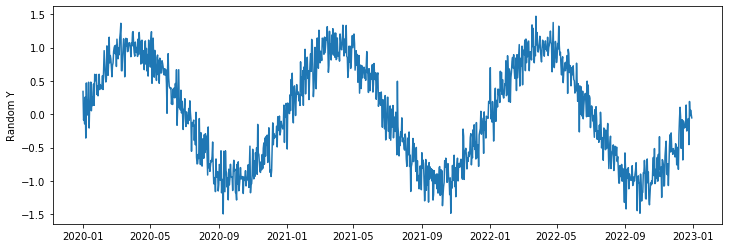

In [322]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df4["dates"],df4["y"])
plt.ylabel('Random Y')
plt.show()


In [323]:
# Moving average
ypd_smooth_forward = df4["y"].rolling(90).mean()
ypd_smooth_center = df4["y"].rolling(90, center=True).mean()


In case you are just using a Pandas series converted previously (`ypd`), you can perform the same computation as follows:
    
```python
ypd.rolling(90).mean()
```

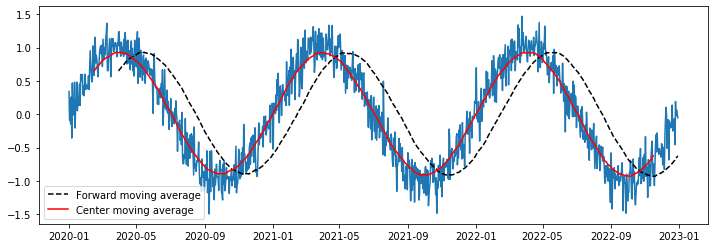

In [324]:
# Show differences in forward and centered moving averages
plt.figure(figsize=(12,4))
plt.plot(df4["dates"],df4["y"])

# Add the moving averages. We did not add the computed moving averages to our DataFrame,
# so we just need to call the variables
plt.plot(df4["dates"],ypd_smooth_forward, '--k',label='Forward moving average')
plt.plot(df4["dates"],ypd_smooth_center, '-r', label='Center moving average')
plt.legend(loc="lower left")
plt.show()


In this case, the selection of a forward or centered moving average affects the timing of maximum and minimum values of the wave. A centered moving average is ideal to preserve important features of the original signal in the resulting smoothed timeseries.


## Operations with  real dataset

In [4]:
# Read CSV file
df = pd.read_csv('../datasets/ok_mesonet_8_apr_2019.csv', sep=',')
df.head(5)

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,,,,,,,,,,
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,,,S,12,20,1011.13,78,48,
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,,82,SSW,19,26,1007.86,82,45,
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,,82,S,20,26,1004.65,84,40,
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,,,S,11,20,1013.64,78,38,


Some columns with empty cells. Ideally we would like to represent missing values with `NaN`. Be filling this cell we need to identify whether they are truly empty or something else is there (e.g. empty string).

In [5]:
# Print one the cells to see what's in there
df.loc[0,'RAIN']

' '

There is a string with a single space. Now we can use the `replace()` method to substitute these strings for `NaN` from the Numpy module.

The `inplace=True` replaces the string with `NaN` without generating a copy of the Pandas DataFrame

In [6]:
df.replace(' ', np.nan, inplace=True)
df.head(5)

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,NaN,NaN,S,12,20,1011.13,78,48,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,NaN,82,S,20,26,1004.65,84,40,NaN
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,NaN,NaN,S,11,20,1013.64,78,38,NaN


### Match specific stations

In [7]:
idx_acme = df['STID'].str.match('ACME')
df[idx_acme]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
idx_starts_with_A = df['STID'].str.match('A')
df[idx_starts_with_A]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,NaN,NaN,S,12,20,1011.13,78,48,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,NaN,82,S,20,26,1004.65,84,40,NaN
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,NaN,NaN,S,11,20,1013.64,78,38,NaN
5,APAC,Apache,OK,34.91,-98.29,2019,4,15,15,20,...,41,NaN,NaN,S,23,29,1008.9,80,49,NaN
6,ARD2,Ardmore,OK,34.19,-97.09,2019,4,15,15,20,...,41,NaN,NaN,S,18,26,1011.43,77,50,NaN
7,ARNE,Arnett,OK,36.07,-99.90,2019,4,15,15,20,...,10,NaN,85,SW,22,32,1005.13,NaN,NaN,NaN


In [9]:
idx_has_A = df['STID'].str.contains('A')
df[idx_has_A].head(15)

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,NaN,NaN,S,12,20,1011.13,78,48,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,NaN,82,S,20,26,1004.65,84,40,NaN
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,NaN,NaN,S,11,20,1013.64,78,38,NaN
5,APAC,Apache,OK,34.91,-98.29,2019,4,15,15,20,...,41,NaN,NaN,S,23,29,1008.9,80,49,NaN
6,ARD2,Ardmore,OK,34.19,-97.09,2019,4,15,15,20,...,41,NaN,NaN,S,18,26,1011.43,77,50,NaN
7,ARNE,Arnett,OK,36.07,-99.90,2019,4,15,15,20,...,10,NaN,85,SW,22,32,1005.13,NaN,NaN,NaN
8,BEAV,Beaver,OK,36.80,-100.53,2019,4,15,15,20,...,9,NaN,84,SW,17,26,1003.9,91,34,NaN
11,BLAC,Blackwell,OK,36.75,-97.25,2019,4,15,15,20,...,38,NaN,NaN,SSW,15,23,1007.02,80,44,NaN


In [10]:
idx = df['NAME'].str.contains('Blackwell') & df['NAME'].str.contains('Lake')
df[idx]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
22,CARL,Lake Carl Blackwell,OK,36.15,-97.29,2019,4,15,15,20,...,36,NaN,80,S,17,25,1007.56,80,50,NaN


The following line won't work because the string matching is case sensitive:

`idx = df['NAME'].str.contains('LAKE')`

In [11]:
idx = df['NAME'].str.contains('Blackwell') | df['NAME'].str.contains('Lake')
df[idx]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
11,BLAC,Blackwell,OK,36.75,-97.25,2019,4,15,15,20,...,38,NaN,NaN,SSW,15,23,1007.02,80,44,NaN
22,CARL,Lake Carl Blackwell,OK,36.15,-97.29,2019,4,15,15,20,...,36,NaN,80,S,17,25,1007.56,80,50,NaN


In [12]:
idx = df['STID'].isin(['ACME','ALTU'])
df[idx]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN
